# Clustering
接下來將以 k-means 來當作我們討論的對象

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## K-means 簡介

K Means 為僅靠data來學習出底層pattern的方法，他的演算法相當簡潔，底下我們隨機產生一些資料點

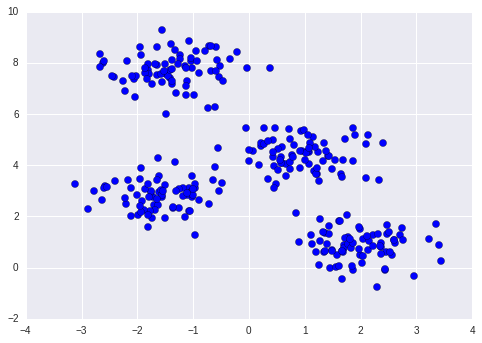

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

由肉眼來分辨的話，可以看出大概有四群不同的物件

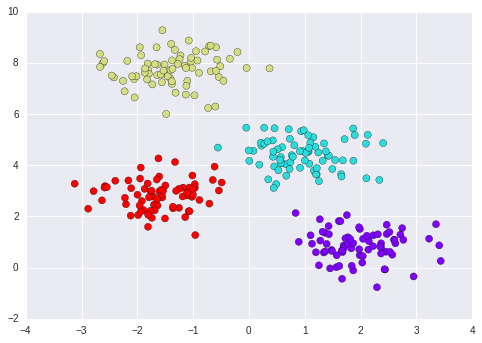

In [3]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

注意我們必須告訴kmeans要分成幾群，可以看出結果相當不錯~!

K-means 實做了 Expectation Maximization (EM) 演算法，這個演算法包含兩個部分:
1. 起始猜出各cluster的中心
2. 重複以下步驟直到收斂
    A. 將資料點分到最近的cluster中心
    B. 找出新分好的cluster mean指定為新的中心

None

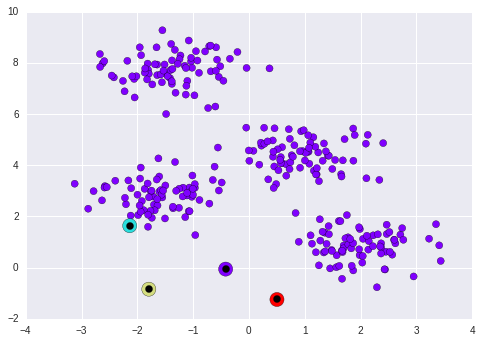

In [9]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

## Kmeans 作數字分類
用內建的數字辨識資料來測試一下kmeans的威力。

In [10]:
from sklearn.datasets import load_digits
digits = load_digits() # Helper function

In [11]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

在 64個維度上做 10個cluster的分類

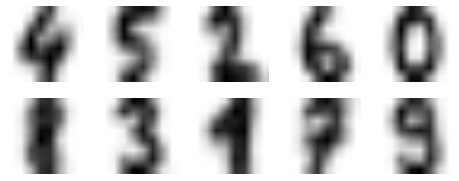

In [12]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

即使沒有label也分得不錯!!

更進一步我們用``PCA``做壓縮後來看看分類結果和真正label的比較圖。

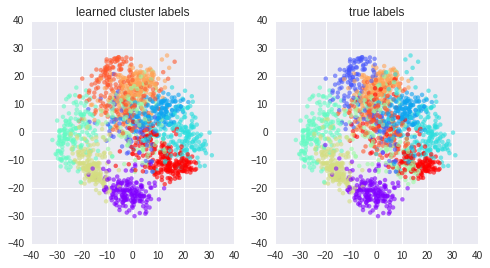

In [8]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

那麼正確率是多少，先用內建的score來看

> 大多數sklearn的estimator都內建score來算performance，根據種類不同算法也不同

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.78853644963828606

再用前幾節用過的confusion matrix來看

[[177   0   0   0   1   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  10 147  13   0   0   0   4   0   2]
 [  0   7   0 155   0   2   0   7   0  12]
 [  0   9   0   0 162   0   0  10   0   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   4   0   0   0   5   0 170   0   0]
 [  0 105   3   2   0   7   2   3   0  52]
 [  0  20   0   6   0   7   0   8   0 139]]


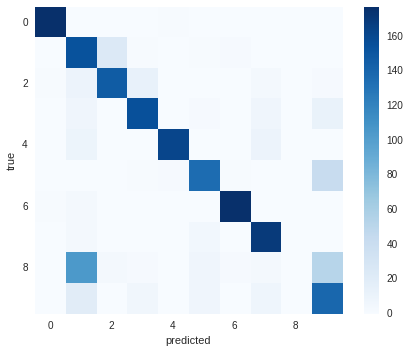

In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');